In [4]:
# %load FIX_FIR_quant_ML.py
"""
=== FIX_FIR_quant_ML.py ===================================================

 Musterlösung zu

- Plotte idealen Frequenzgang und Frequenzgang mit quant. Koeffizienten
- Drucke quantisierte Koeffizienten und Quantisierungsfehler für Q(0.7) und Q(0.17)

 (c) 2016 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"
===========================================================================
"""
from __future__ import print_function, division
import os, sys
import time
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, stem, grid, xlabel, ylabel, \
    subplot, title, clf, xlim, ylim
#%matplotlib notebook
%matplotlib inline
import numpy as np
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [9, 6]

    b    |  bq(0.17)  | eps(0.17)|  bq(0.7)  | eps(0.7)  
 --------------------------------------------------------
 0.01623 |  0.0162277 |  2.28E-06|  0.015625 |  6.05E-04
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
-0.06871 | -0.0687103 |  3.27E-07| -0.070312 |  1.60E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
 0.30399 |   0.303986 |  4.40E-06|  0.296875 |  7.11E-03
 0.50000 |        0.5 |  0.00E+00|  0.500000 |  0.00E+00
 0.30399 |   0.303986 |  4.40E-06|  0.296875 |  7.11E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
-0.06871 | -0.0687103 |  3.27E-07| -0.070312 |  1.60E-03
 0.00000 |          0 |  0.00E+00|  0.000000 |  0.00E+00
 0.01623 |  0.0162277 |  2.28E-06|  0.015625 |  6.05E-04


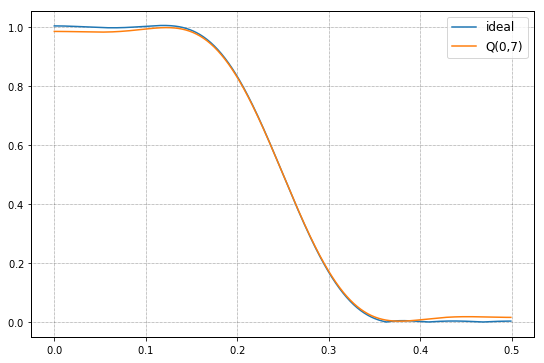

In [6]:
b = [0.01623, 0, -0.06871, 0, 0.30399, 0.5, 0.30399, 0, -0.06871, 0, 0.01623]
#
q_obj7 = {'QI':0, 'QF': 7, 'quant':'floor', 'ovfl': 'none'}
q_obj17 = {'QI':0, 'QF': 17, 'quant':'floor', 'ovfl': 'none'}
#
fx_7 = fx.Fixed(q_obj7)
fx_17 = fx.Fixed(q_obj17)

bq7  = fx_7.fix(b) # quantize a
bq17 = fx_17.fix(b)
title_str = "    b    |  bq(0.17)  | eps(0.17)|  bq(0.7)  | eps(0.7) "
print(title_str, "\n","-"*len(title_str))
for i in range(len(b)):
    print("{0:8.5f} | {1:10.6g} | {2:9.2E}| {3:9.6f} | {4:9.2E}".format(b[i], bq17[i],
          b[i] - bq17[i], bq7[i], b[i] - bq7[i]))

w, H_id = sig.freqz(b)
w, H_q7 = sig.freqz(bq7)
F = w / (2*np.pi)
fig = figure(1)
ax = fig.add_subplot(111)
ax.plot(F, np.abs(H_id), label = "ideal")
ax.plot(F, np.abs(H_q7), label = "Q(0,7)")
ax.legend()
plt.show()